## Discovery of handwashing
In this notebook, we're going to reanalyze the data that made <a href='https://en.wikipedia.org/wiki/Ignaz_Semmelweis'>Dr.Semmelweis</a> (1840s) discover the importance of handwashing.<br>

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
yearly_deaths = pd.read_csv('data_files/discovery_of_handwashing/yearly_deaths_by_clinic.csv')
monthly_deaths_clinic1 = pd.read_csv('data_files/discovery_of_handwashing/monthly_deaths.csv', parse_dates=['date'])
print(yearly_deaths.head(10))
print(monthly_deaths_clinic1.head(10))

   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1
5  1846    4010     459  clinic 1
6  1841    2442      86  clinic 2
7  1842    2659     202  clinic 2
8  1843    2739     164  clinic 2
9  1844    2956      68  clinic 2
        date  births  deaths
0 1841-01-01     254      37
1 1841-02-01     239      18
2 1841-03-01     277      12
3 1841-04-01     255       4
4 1841-05-01     255       2
5 1841-06-01     200      10
6 1841-07-01     190      16
7 1841-08-01     222       3
8 1841-09-01     213       4
9 1841-10-01     236      26


In [38]:
# Proportion of deaths per number of births.
yearly_deaths['proportion_deaths'] = yearly_deaths['deaths'] / yearly_deaths['births']
monthly_deaths_clinic1['proportion_deaths'] = monthly_deaths_clinic1['deaths'] / monthly_deaths_clinic1['births']

In [11]:
# Split clinics data
yearly_deaths_clinic1 = yearly_deaths[yearly_deaths['clinic'] == 'clinic 1']
yearly_deaths_clinic2 = yearly_deaths[yearly_deaths['clinic'] == 'clinic 2']

Let's look at the proportions of death in clinics visually.

Text(0, 0.5, 'Proportion deaths')

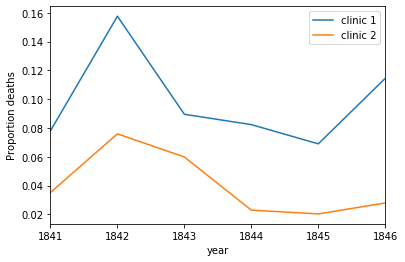

In [42]:
ax = yearly_deaths_clinic1.plot('year', 'proportion_deaths', label='clinic 1')
yearly_deaths_clinic2.plot('year', 'proportion_deaths', label='clinic 2', ax=ax)
ax.set_ylabel('Proportion deaths')

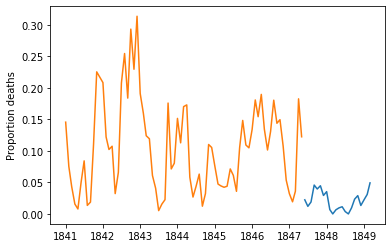

In [62]:
hand_washing_start = pd.to_datetime('1847-06-01')
before_hand_washing = np.ma.masked_where(monthly_deaths_clinic1['date'] < hand_washing_start, 
                                               monthly_deaths_clinic1['proportion_deaths'])
after_hand_washing = np.ma.masked_where(monthly_deaths_clinic1['date'] >= hand_washing_start, 
                                               monthly_deaths_clinic1['proportion_deaths'])
fig, ax = plt.subplots()
ax = ax.plot(monthly_deaths_clinic1['date'], before_hand_washing, monthly_deaths_clinic1['date'], after_hand_washing)
plt.ylabel('Proportion deaths')
plt.show()

Rates drop markedly when Dr.Semmelweis implemented chlorine hand washing mid-May 1847.

In [69]:
# Difference in mean monthly proportion of deaths due to handwashing
mean_diff = np.mean(after_hand_washing) - np.mean(before_hand_washing)
print('Handwashing reduces the proportion of deaths by {0:.2f}%'.format(mean_diff*100))

Handwashing reduces the proportion of deaths by 8.40%


### A bootstrap analysis

In [98]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = pd.Series(before_hand_washing).sample(frac=1, replace=True)
    boot_after = pd.Series(after_hand_washing).sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)

0.025    0.067126
0.975    0.101267
dtype: float64


So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. 